# Environment setup

In [ ]:
# Install packages from pip
#!pip install cellxgene_census datasets scanpy igraph leidenalg accelerate scvi-colab

In [ ]:
# To install geneformer we have to clone the git repo first
#!git lfs install
#!git clone https://huggingface.co/ctheodoris/Geneformer
#%cd Geneformer
#!pip install .
#%cd ..

# Models download

Models hosted on https://cellxgene.cziscience.com/census-models normally require Amazon Web Services (AWS) to download. Since aws-cli is not installed on google colab I have temporarily loaded them to dropbox.  

In [15]:
# Download and extract geneformer model
!wget 'https://www.dropbox.com/scl/fi/4edmbf7fik0q8kzyq2pef/fine_tuned_geneformer.tar.gz?rlkey=v0ux8v9a3qe8il6o7bowxep8c&st=6ar0ptjg&dl=0' -O fine_tuned_geneformer.tar.gz
!tar -xzf fine_tuned_geneformer.tar.gz

--2025-07-08 13:29:37--  https://www.dropbox.com/scl/fi/4edmbf7fik0q8kzyq2pef/fine_tuned_geneformer.tar.gz?rlkey=v0ux8v9a3qe8il6o7bowxep8c&st=6ar0ptjg&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e95dca81a85bfc044d8af6bdf.dl.dropboxusercontent.com/cd/0/inline/CtGm-nKK0CqV_qO3RNEQfAwrN4rOH-cHS4YUmT80Q7NDbEwiav83OGOtgDJlcJDwJLpBxhllXmqh1YHWoJVVjtei_EWDXF8jG8p053RCNHBMG0GtUcnOpTRs8OiriGvxVvvrqVBKcwujY_B5xUotnzOk/file# [following]
--2025-07-08 13:29:37--  https://uc9e95dca81a85bfc044d8af6bdf.dl.dropboxusercontent.com/cd/0/inline/CtGm-nKK0CqV_qO3RNEQfAwrN4rOH-cHS4YUmT80Q7NDbEwiav83OGOtgDJlcJDwJLpBxhllXmqh1YHWoJVVjtei_EWDXF8jG8p053RCNHBMG0GtUcnOpTRs8OiriGvxVvvrqVBKcwujY_B5xUotnzOk/file
Resolving uc9e95dca81a85bfc044d8af6bdf.dl.dropboxusercontent.com (uc9e95dca81a85bfc044d8af6bdf.dl.dropboxuser

In [ ]:
!ls fine_tuned_geneformer

# Data download

In [5]:
# Download and extract pbmc data

!mkdir -p data
!wget -nv -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
!tar -xzf data/pbmc3k_filtered_gene_bc_matrices.tar.gz -C data/

2025-07-10 12:49:19 URL:https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [7621991/7621991] -> "data/pbmc3k_filtered_gene_bc_matrices.tar.gz" [1]


In [6]:
# /home/znazari/try_geneformer/data/filtered_gene_bc_matrices/hg19

In [7]:
raw_data_path = Path("/projects/bioinformatics/DB/IMMUCan/data_raw")

In [ ]:
# barcodes.tsv  genes.tsv  matrix.mtx


In [10]:
import os
import shutil

# --- Define Source and Destination Paths ---
source_dir = '/projects/bioinformatics/DB/IMMUCan/data_raw'
destination_dir = '/home/znazari/try_geneformer/data/filtered_gene_bc_matrices/hg19'

# Files to copy
files_to_copy = ['barcodes.tsv', 'genes.tsv', 'matrix.mtx']

# --- Step 1: Create the destination directory if it doesn't exist ---
# The exist_ok=True argument means it won't raise an error if the directory already exists.
os.makedirs(destination_dir, exist_ok=True)
print(f"Ensured destination directory exists: {destination_dir}")

# --- Method 1: Using shell commands (`!cp`) ---
# This is often quick and convenient in Jupyter.

print("\n--- Copying files using !cp (shell command) ---")
for file_name in files_to_copy:
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    
    # Use !cp to copy the file
    # -v for verbose output (optional)
    !cp {source_path} {destination_path}
    print(f"Copied {file_name}")

print("\nShell copy complete.")

Ensured destination directory exists: /home/znazari/try_geneformer/data/filtered_gene_bc_matrices/hg19

--- Copying files using !cp (shell command) ---
Copied barcodes.tsv
Copied genes.tsv
Copied matrix.mtx

Shell copy complete.


In [3]:
# Dowload gene list
! wget 'https://www.dropbox.com/scl/fi/brauikmesjfworl67cxov/cpdb_genelist.csv?rlkey=55ankib03njbf9tkci8tgzqc6&st=ezcv94sg&dl=0' -O cpdb_genelist.csv

--2025-07-08 13:18:15--  https://www.dropbox.com/scl/fi/brauikmesjfworl67cxov/cpdb_genelist.csv?rlkey=55ankib03njbf9tkci8tgzqc6&st=ezcv94sg&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a2c97c0b73c2dab6c9924ebaa.dl.dropboxusercontent.com/cd/0/inline/CtHpC9Qg38_IID_iTFVGO646riWPbtOtBcksg9ZZU_3R7bXwsyxGNxMJsyHuaRx1QE9Vjre1vkitMMP11vcCwqe2bxnCIfcJ87aZM9sqZRSkNJuDIwpRMNVmPpoMejY-tD307C8-Swe8UnVvsORkPpMX/file# [following]
--2025-07-08 13:18:16--  https://uc0a2c97c0b73c2dab6c9924ebaa.dl.dropboxusercontent.com/cd/0/inline/CtHpC9Qg38_IID_iTFVGO646riWPbtOtBcksg9ZZU_3R7bXwsyxGNxMJsyHuaRx1QE9Vjre1vkitMMP11vcCwqe2bxnCIfcJ87aZM9sqZRSkNJuDIwpRMNVmPpoMejY-tD307C8-Swe8UnVvsORkPpMX/file
Resolving uc0a2c97c0b73c2dab6c9924ebaa.dl.dropboxusercontent.com (uc0a2c97c0b73c2dab6c9924ebaa.dl.dropboxusercontent.com

# Geneformer for cell class prediction and data projection

This notebook provides examples to utilize the CELLxGENE collaboration fine-tuned Geneformer model with user data. For more information on the model please refer to the [Census model page](https://cellxgene.cziscience.com/census-models).

**IMPORTANT:** This tutorial requires cellxgene-census package version 1.9.1 or later.

**Contents**

1. Requirements.
1. Preparing data and model.
1. Using the Geneformer fine-tuned model for **cell subclass inference**.
1. Using the Geneformer fine-tuned model for **data projection**.

> ⚠️ Note "cell subclass" is a high-level grouping of cell types as annotated in CELLxGENE Discover via the CL ontology see [https://cellxgene.cziscience.com/collections](https://cellxgene.cziscience.com/collections

> ⚠️ Note that the Census RNA data includes duplicate cells present across multiple datasets. Duplicate cells can be filtered in or out using the cell metadata variable `is_primary_data` which is described in the [Census schema](https://github.com/chanzuckerberg/cellxgene-census/blob/main/docs/cellxgene_census_schema.md#repeated-data).

### Downloading the fine-tuned Geneformer model

### Importing required packages

Finally all the required packages are loaded.

In [2]:
import warnings
from pathlib import Path
import pandas as pd

warnings.filterwarnings("ignore")

import json
import os

#import cellxgene_census
import datasets
import numpy as np
import scanpy as sc
from geneformer import DataCollatorForCellClassification
from geneformer import EmbExtractor
from geneformer import TranscriptomeTokenizer
from transformers import BertForSequenceClassification, Trainer

from torch import set_float32_matmul_precision
set_float32_matmul_precision('medium')

## Preparing data and model

### Preparing single-cell data

Let's load the test data. In preparation to use with Geneformer we do the following:

- Set the index as the ENSEMBL gene ID and stores it in the `obs` column `"ensembl_id"`
  - e.g. `ENSG00000139618` (*without* a version number suffix)
- Add read counts to the `obs` column `"n_counts"`
- Add an ID column to be used for joining later in the  `obs` column `"joinid"`

Then we write the resulting H5AD file to disk.

In [3]:
path_lorenzo=Path("/home/lnemati/resources/genes")

In [11]:
adata = sc.read_10x_mtx("data/filtered_gene_bc_matrices/hg19/", var_names="gene_ids")

In [13]:
ensembl_symbol = pd.read_csv(path_lorenzo/'ensembl_symbol.csv', sep=',')
ensembl_symbol;

In [14]:
df_specific_renamed = ensembl_symbol.copy()

# Using the 'columns' argument
df_specific_renamed = df_specific_renamed.rename(columns={
    'feature_id': 'ensembl_id',
    'feature_name': 'gene_symbols'
})

df_specific_renamed;

In [15]:
symbol_to_ensembl = dict(zip(df_specific_renamed["gene_symbols"], df_specific_renamed["ensembl_id"]))

In [16]:
adata.var["ensembl_id"] = adata.var["gene_symbols"].map(symbol_to_ensembl)

In [17]:
adata = adata[:,~adata.var.isna().any(axis=1)]

In [18]:

#adata.var["ensembl_id"] = adata.var.index


adata.obs["n_counts"] = adata.X.sum(axis=1)
adata.obs["joinid"] = list(range(adata.n_obs))

h5ad_dir = "./data/h5ad/"

if not os.path.exists(h5ad_dir):
    os.makedirs(h5ad_dir)


In [19]:
adata.write(h5ad_dir + "pbmcs.h5ad")

In [20]:
adata.var

,gene_symbols,ensembl_id
DDX11L1,DDX11L1,ENSG00000223972
WASH7P,WASH7P,ENSG00000227232
MIR1302-2HG,MIR1302-2HG,ENSG00000243485
FAM138A,FAM138A,ENSG00000237613
OR4G4P,OR4G4P,ENSG00000268020
...,...,...
DUX4L22,DUX4L22,ENSG00000277274
DUX4L21,DUX4L21,ENSG00000275610
DUX4L20,DUX4L20,ENSG00000276164
DUX4L25,DUX4L25,ENSG00000280337


In [114]:
adata.var['ensembl_id']

DDX11L1        ENSG00000223972
WASH7P         ENSG00000227232
MIR1302-2HG    ENSG00000243485
FAM138A        ENSG00000237613
OR4G4P         ENSG00000268020
                    ...       
DUX4L22        ENSG00000277274
DUX4L21        ENSG00000275610
DUX4L20        ENSG00000276164
DUX4L25        ENSG00000280337
LINC01670      ENSG00000279094
Name: ensembl_id, Length: 36995, dtype: object

Now we can tokenize the test data using Geneformer's tokenizer, while keeping track of `"joinid"` for future joining.

In [21]:
token_dir = "data/tokenized_data/"

if not os.path.exists(token_dir):
    os.makedirs(token_dir)

tokenizer = TranscriptomeTokenizer(custom_attr_name_dict={"joinid": "joinid"})
tokenizer.tokenize_data(
    data_directory=h5ad_dir,
    output_directory=token_dir,
    output_prefix="pbmc",
    file_format="h5ad",
)

Tokenizing data/h5ad/pbmcs.h5ad
data/h5ad/pbmcs.h5ad has no column attribute 'filter_pass'; tokenizing all cells.
Creating dataset.


Map:   0%|          | 0/39391 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/39391 [00:00<?, ? examples/s]

### Preparing data from model

Then let's fetch the mapping dictionary between Geneformer IDs and the associated cell subclass labels. This information is stored along the fine-tuned model.

In [22]:
model_dir = "./fine_tuned_geneformer/"
label_mapping_dict_file = os.path.join(model_dir, "label_to_cell_subclass.json")

with open(label_mapping_dict_file) as fp:
    label_mapping_dict = json.load(fp)

This dictionary contains all the possible cell labels available for the model, and the predictions on the section below will use these labels.

In [23]:
for k in list(label_mapping_dict.keys())[:5]:
    print(k, ': ', label_mapping_dict[k])

0 :  B cell
1 :  BEST4+ intestinal epithelial cell, human
2 :  CD4-positive, alpha-beta T cell
3 :  CD8-positive, alpha-beta T cell
4 :  CNS neuron (sensu Vertebrata)


## Using the Geneformer fine-tuned model for cell subclass inference

### Loading tokenized data

Let's load the tokenized test data.

In [24]:
dataset = datasets.load_from_disk(token_dir + "pbmc.dataset")
dataset

Dataset({
    features: ['input_ids', 'joinid', 'length'],
    num_rows: 39391
})

We add a dummy cell metadata column `"label"` needed for Geneformer to make predictions.

In [25]:
dataset
dataset = dataset.add_column("label", [0] * len(dataset))

### Performing inference of cell subclass

Now we can load the model and run the inference workflow.

> ⚠️ Note, this step will be slow with CPUs, a machine with one GPU is recommended

In [26]:
print(f"Dataset size: {len(dataset)}")
if len(dataset) == 0:
    print("Warning: The dataset is empty. Prediction will not run.")

Dataset size: 39391


In [27]:
# reload pretrained model
model = BertForSequenceClassification.from_pretrained(model_dir)
# create the trainer
trainer = Trainer(model=model, data_collator=DataCollatorForCellClassification())
# use trainer
predictions = trainer.predict(dataset)

Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


And finally we select the most likely cell class based on the probability vector from the predictions of each cell in our test data.

In [28]:
predicted_label_ids = np.argmax(predictions.predictions, axis=1)
predicted_logits = [predictions.predictions[i][predicted_label_ids[i]] for i in range(len(predicted_label_ids))]
predicted_labels = [label_mapping_dict[str(i)] for i in predicted_label_ids]

### Inspecting inference results

Then we add the prediction back to our loaded AnnData test dataset.

In [29]:
adata.obs["predicted_cell_subclass"] = predicted_labels
adata.obs["predicted_cell_subclass_probability"] = np.exp(predicted_logits) / (1 + np.exp(predicted_logits))

And it's ready for inspecting the predictions. Let's visualize the predictions on the UMAP space, the following is a basic processing workflow to derive a UMAP representation, of the data.

In [30]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [32]:
# After you have run:
# sc.pp.neighbors(adata) # (if not done already)
# sc.tl.leiden(adata)

num_leiden_clusters = len(adata.obs['leiden'].cat.categories)
print(f"Leiden algorithm identified {num_leiden_clusters} clusters.")

# You can also see the categories themselves:
# print(adata.obs['leiden'].cat.categories)

Leiden algorithm identified 36 clusters.


In [33]:
# Assuming this is my existing list of 10 known cell types
original_cell_types_known = [
    "CD4-positive, alpha-beta T cell (1)",
    "CD4-positive, alpha-beta T cell (2)",
    "CD14-positive, monocyte",
    "B cell (1)",
    "CD8-positive, alpha-beta T cell",
    "FCGR3A-positive, monocyte",
    "natural killer cell",
    "dendritic cell",
    "megakaryocyte",
    "B cell (2)",
]

# We need 36 names in total. I have 10, so I need 36 - 10 = 26 more names.
# Create generic names for the remaining clusters
# Remember, Leiden clusters are typically '0', '1', '2', ..., '35'
# So, 'Cluster 0' maps to the first item, 'Cluster 1' to the second, etc.
# My original list likely covers clusters 0-9.

# Extend the list with placeholder names for the remaining clusters (e.g., from cluster 10 up to 35)
for i in range(len(original_cell_types_known), 36):
    original_cell_types_known.append(f"Cluster {i}")

# Verify the new length
print(f"New length of original_cell_types_known: {len(original_cell_types_known)}")
# You can also print the list to see its contents:
# print(original_cell_types_known)

# Now, apply the renaming
adata.rename_categories("leiden", original_cell_types_known)

print("Categories successfully renamed with placeholders!")

New length of original_cell_types_known: 36
Categories successfully renamed with placeholders!


Let's also add the original cell type annotations as obtained in [Scapy's annotation tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html) of the same data.

These are the original annotations.

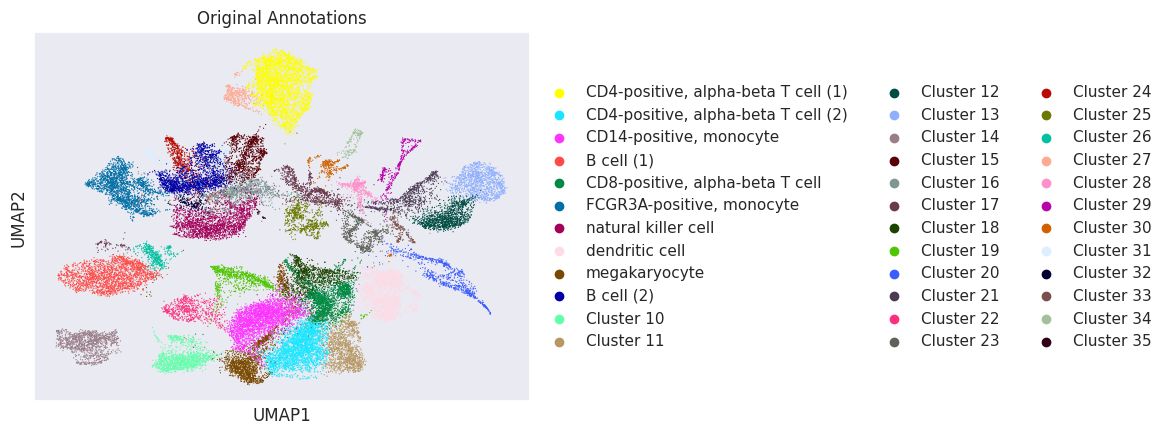

In [34]:
sc.pl.umap(adata, color="leiden", title="Original Annotations")

And these are the predicted annotations.

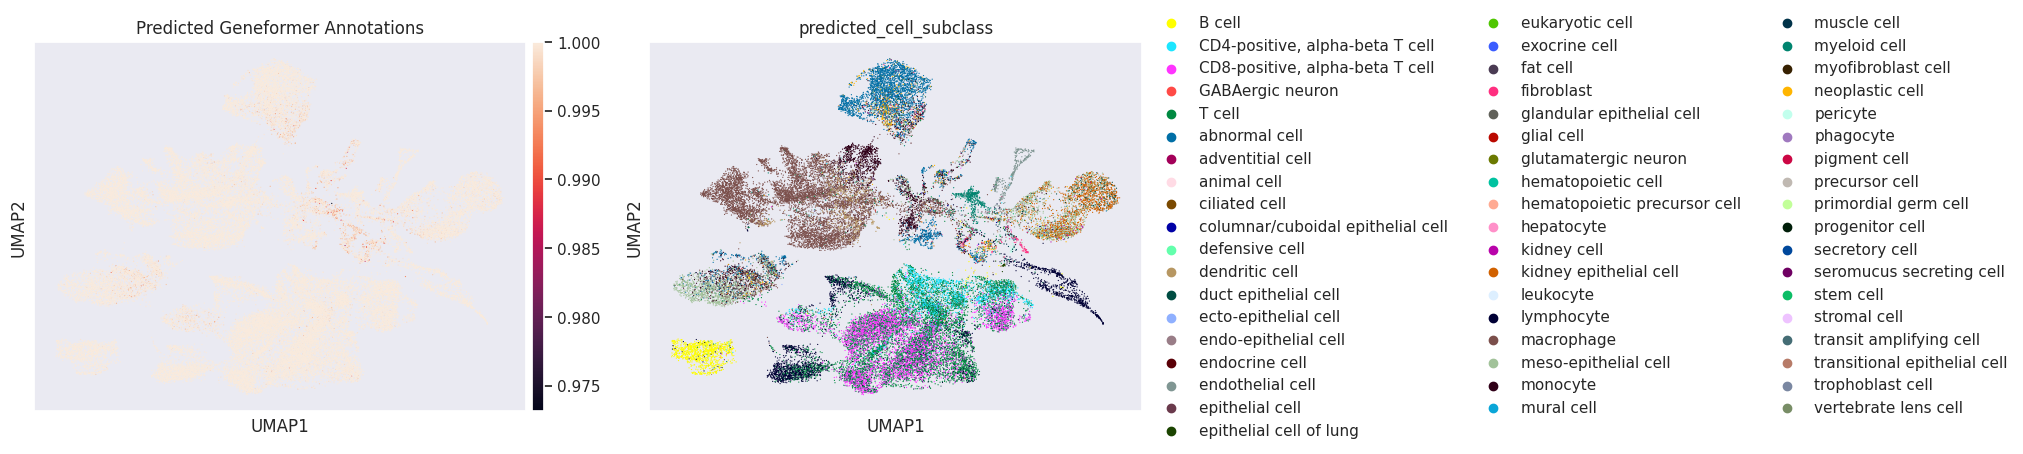

In [35]:
sc.pl.umap(
    adata,
    color=["predicted_cell_subclass_probability", "predicted_cell_subclass"],
    title="Predicted Geneformer Annotations",
)

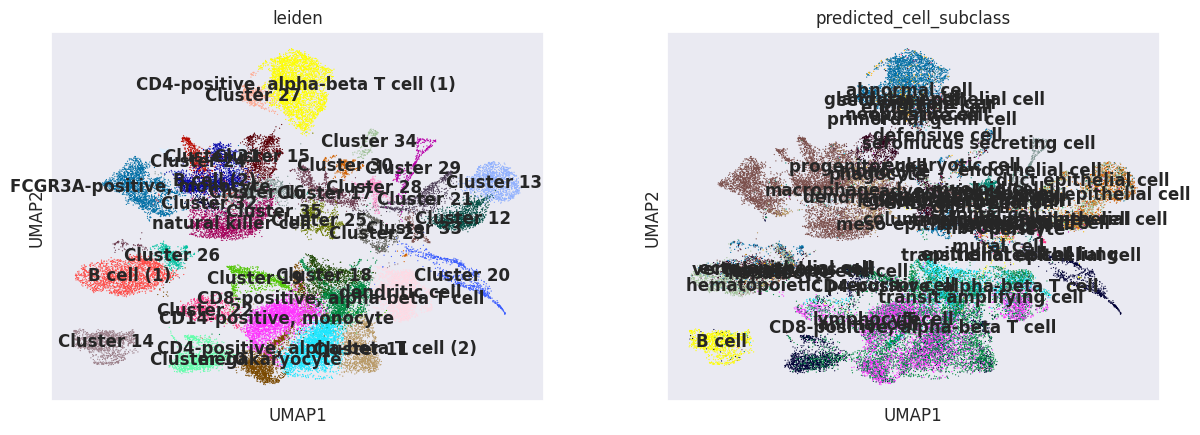

In [36]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_cell_subclass"],
    legend_loc = 'on data'
)

## Using the Geneformer fine-tuned model for data projection

### Generating Geneformer embeddings for 10X PBMC 3K data

To project new data, for example the 10X PBMC 3K data, into the Census embedding space from Geneformer's fine-tune model, we can use `EmbExtractor` from the [Geneformer](https://huggingface.co/ctheodoris/Geneformer) package as follows.

We first need to get the number of categories (cell subclasses) present in the model.

In [37]:
n_classes = len(label_mapping_dict)

Then we can run the `EmbExtractor`, which randomize the cells during the process and thus we keep track of `"joinid"`.

> ⚠️ Note, this step will be slow with CPUs, a machine with one GPU is recommended

In [38]:
output_dir = "data/geneformer_embeddings"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

embex = EmbExtractor(
    model_type="CellClassifier",
    num_classes=n_classes,
    max_ncells=None,
    emb_label=["joinid"],
    emb_layer=0,
    forward_batch_size=30,
    nproc=8,
)

embs = embex.extract_embs(
    model_directory=model_dir,
    input_data_file=token_dir + "pbmc.dataset",
    output_directory=output_dir,
    output_prefix="emb",
)

  0%|          | 0/1314 [00:00<?, ?it/s]

In [ ]:
!ls data/geneformer_embeddings



Then we simply re-order the embeddings based on `"joinid"` and then merge them to the original AnnData

In [39]:
embs = embs.sort_values("joinid")
adata.obsm["geneformer"] = embs.drop(columns="joinid").to_numpy()

Let's take a look at these Geneformer embeddings in a UMAP representation

In [40]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40, use_rep="geneformer")
sc.tl.umap(adata)

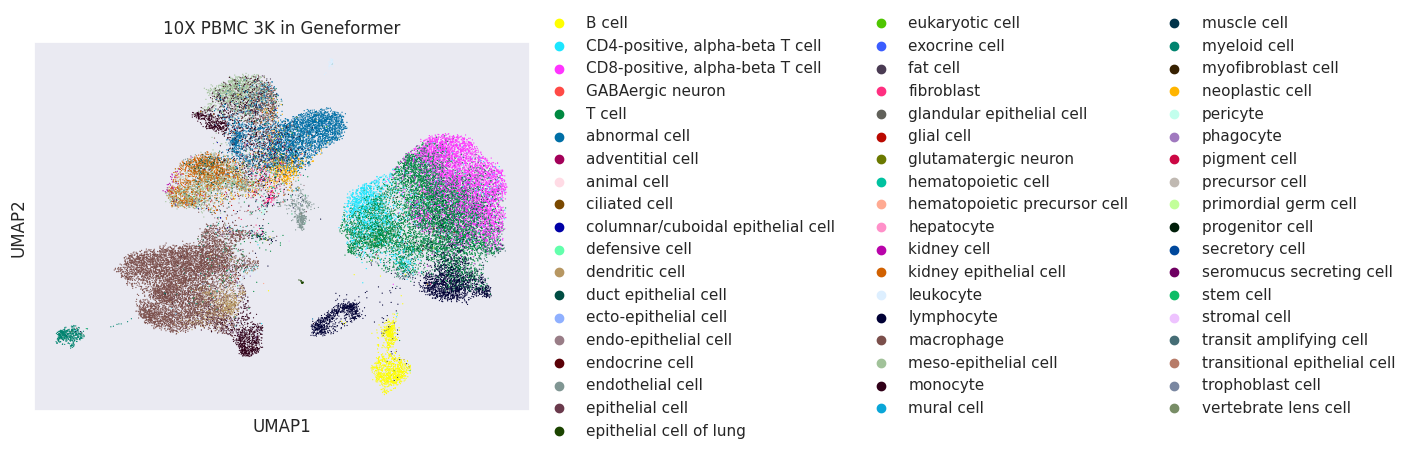

In [41]:
sc.pl.umap(adata, color="predicted_cell_subclass", title="10X PBMC 3K in Geneformer")

### Joining Geneformer embeddings from 10X PBMC 3K data with other Census datasets

There are multiple datasets in Census from PBMCs, and all human Census data has pre-calculated Geneformer embeddings, so now we can join the embeddings we generated above from the 10X PBMC 3K dataset with Census data.

Let's grab a few PBMC datasets from Census and request the Geneformer embeddings.

In [42]:
import cellxgene_census

In [43]:
# Some PBMC data from these collections
# 1. https://cellxgene.cziscience.com/collections/c697eaaf-a3be-4251-b036-5f9052179e70
# 2. https://cellxgene.cziscience.com/collections/f2a488bf-782f-4c20-a8e5-cb34d48c1f7e

dataset_ids = [
    "fa8605cf-f27e-44af-ac2a-476bee4410d3",
    "3c75a463-6a87-4132-83a8-c3002624394d",
]

with cellxgene_census.open_soma(census_version="2023-12-15") as census:

    adata_census = cellxgene_census.get_anndata(
        census=census,
        measurement_name="RNA",
        organism="Homo sapiens",
        obs_value_filter=f"dataset_id in {dataset_ids}",
        obs_embeddings=["geneformer"],
  )

To simplify let's select the genes that are also present in the 10X PBMC 3K dataset.

In [44]:
adata_census.var_names = adata_census.var["feature_id"]
shared_genes = list(set(adata.var_names) & set(adata_census.var_names))
adata_census = adata_census[:, shared_genes]

And take a subset of these cells, let's take 3K cells to match the size of the test data.

In [45]:
index_subset = np.random.choice(adata_census.n_obs, size=3000, replace=False)
adata_census = adata_census[index_subset, :]

Now we can join these Census data to the 10X PBMC 3K data

In [46]:
adata_census.obs["dataset"] = "Census - " + adata_census.obs["dataset_id"].astype(str)
adata.obs["dataset"] = "10X PBMC 3K"
adata.obs["cell_type"] = "Predicted - " + adata.obs["predicted_cell_subclass"].astype(str)

adata_joined = sc.concat([adata, adata_census], join="outer", label="batch")

Let's now inspect all of the cells in the UMAP space.

In [47]:
sc.pp.neighbors(adata_joined, n_neighbors=10, n_pcs=40, use_rep="geneformer")
sc.tl.umap(adata_joined)

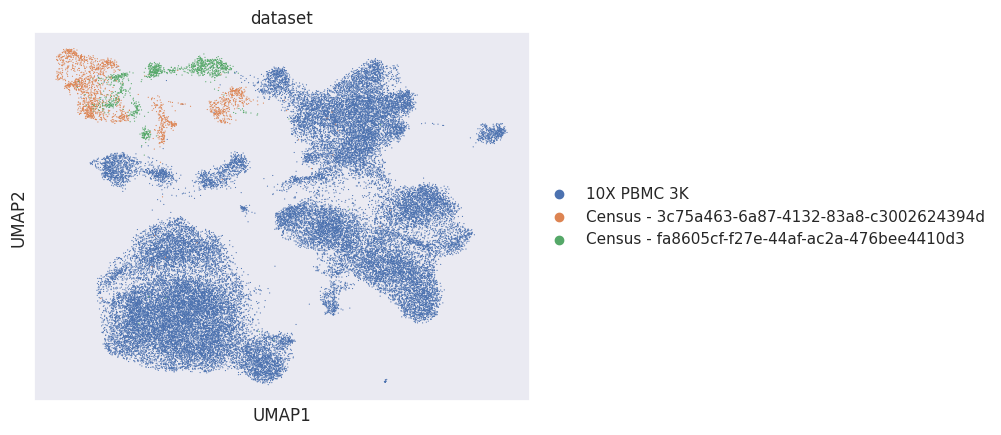

In [48]:
sc.pl.umap(adata_joined, color="dataset")

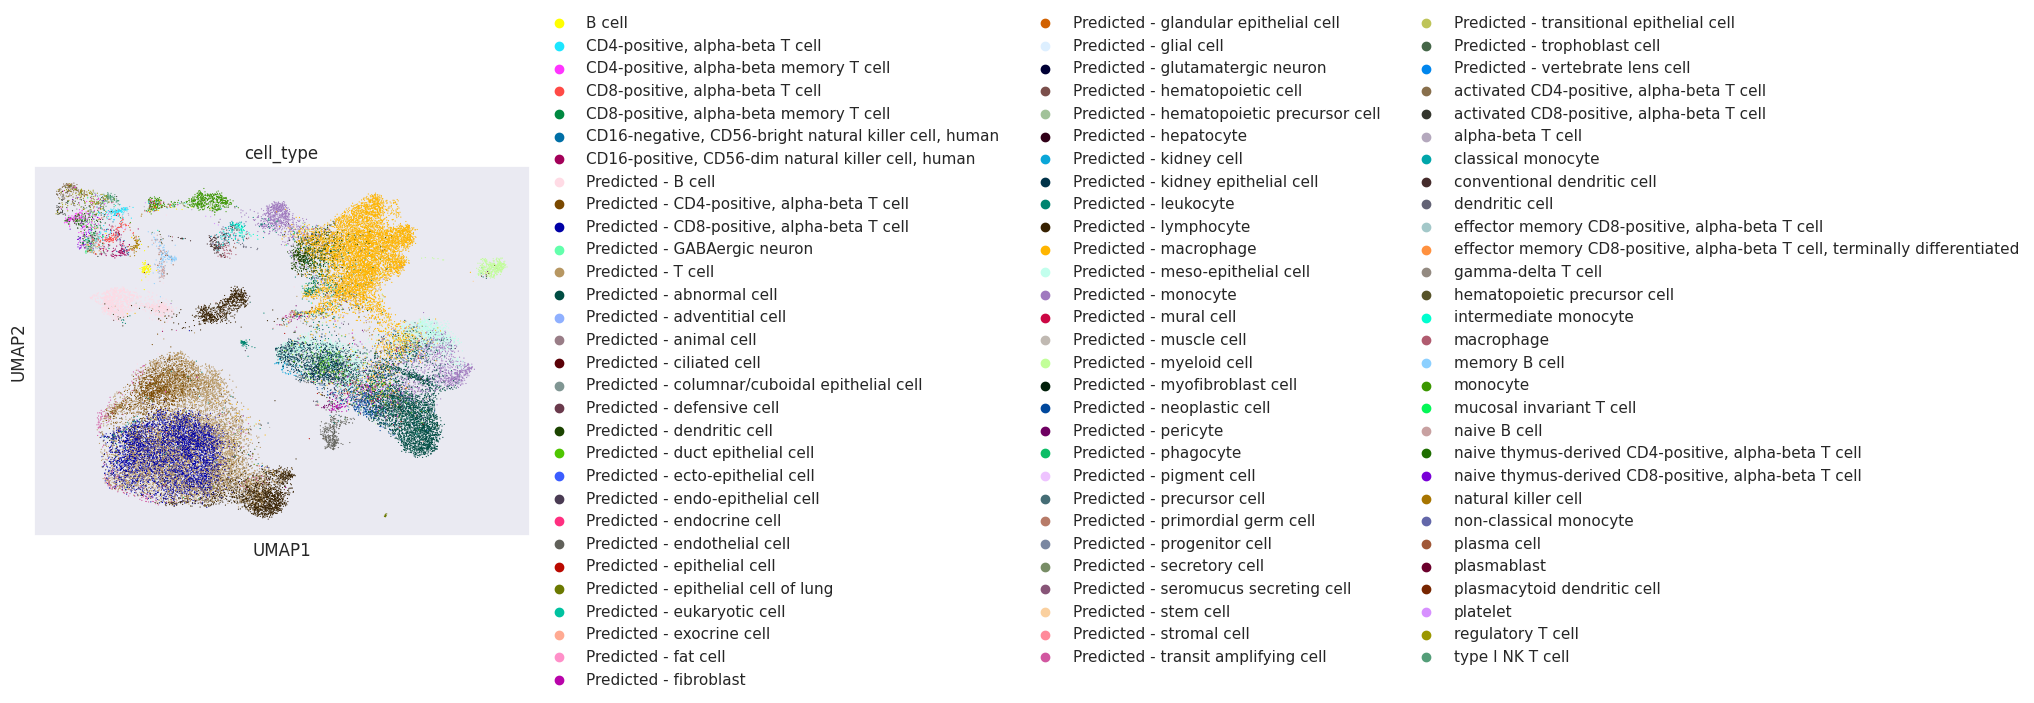

In [49]:
sc.pl.umap(adata_joined, color="cell_type")